<a href="https://colab.research.google.com/github/Gichere/movie-recommendation-system-using-matrix-factorization/blob/main/movie_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie recommender system using Matrix factorization-based Algorithm
This is a movie recommendation system that considers user-user similarity, movie-movie similarity, global averages, and matrix factorization.

Matrix factorization is a class of collaborative filtering algorithms used in recommender systems. The main reason for choosing this algorithm is because highly effective compared to other algorithmslike PCA. This family of methods became widely known during the Netflix prize challenge due to how effective it was.
Matrix factorization algorithms work by decomposing the user-movie interaction matrix into the product of two lower dimensionality rectangular matrices, say U and M. The decomposition is done in such a way that the product results in almost similar values to the user-movie interaction matrix. Here, U represents the user matrix, M represents the movie matrix, n is the number of users, and m is the number of movies.
Each row of the user matrix represents a user and each column of the movie matrix represents a movie.


# Introduction to singular value decomposition

When it comes to dimensionality reduction, the Singular Value Decomposition (SVD) is a popular method in linear algebra for matrix factorization in machine learning. Such a method shrinks the space dimension from N-dimension to K-dimension (where K<N) and reduces the number of features. SVD constructs a matrix with the row of users and columns of items and the elements are given by the users’ ratings. Singular value decomposition decomposes a matrix into three other matrices and extracts the factors from the factorization of a high-level (user-item-rating) matrix.

A=USV^T.

Matrix U: singular matrix of (user*latent factors)

Matrix S: diagonal matrix (shows the strength of each latent factor)
Matrix U: singular matrix of (item*latent factors)

From matrix factorization, the latent factors show the characteristics of the items. Finally, the utility matrix A is produced with shape m*n. The final output of the matrix A reduces the dimension through latent factors’ extraction. From the matrix A, it shows the relationships between users and items by mapping the user and item into r-dimensional latent space. Vector X_i is considered each item and vector Y_u is regarded as each user. The rating is given by a user on an item as R_ui = X^T_i * Y_u. The loss can be minimized by the square error difference between the product of R_ui and the expected rating.

 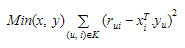

Regularization is used to avoid overfitting and generalize the dataset by adding the penalty.

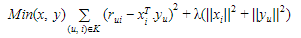
 
Here, we add a bias term to reduce the error of actual versus predicted value by the model.

(u, i): user-item pair

μ: the average rating of all items

bi: average rating of item i minus μ

bu: the average rating given by user u minus μ

The equation below adds the bias term and the regularization term:
 
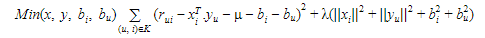


## Installing required new libraries

In [ ]:
# Acquiring the dataset
#The dataset used in this movie recommender system is open source dataset
#obtained from MovieLens.100,000 ratings and 3,600 tag applications applied 
# to 9,000 movies by 600 users
# https://grouplens.org/datasets/movielens/latest/

In [ ]:
#In this recommender system, Surprise Python Library will be used

In [ ]:
#Installing the surprise library
!pip install surprise

     |████████████████████████████████| 11.8MB 3.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670928 sha256=a2d455b55da83ee02c631d60e1c61c59ffbee8d1997ad3f7a1bdd00863c3e566
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


## Loading the required libraries for the analysis

In [ ]:
#loading the required libraries for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import surprise
import sklearn
import scipy as sparse
import scipy.sparse._sparsetools
import time
import xgboost as xgb
from scipy.sparse import csr_matrix, find
from surprise import SVD
from surprise import Reader, Dataset
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
from surprise.model_selection import cross_validate
from surprise import accuracy

## Dataset Context
The dataset used in this project is derived from MovieLens by GroupLens research organization and saved in my GitHub public  repository https://github.com/Gichere/movielens_dataset_latest/blob/main/ratings.csv
## Dataset content
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.
## Dataset Description


1.   userID: MovieLens users were selected at random for inclusion. Their ids have been anonymized.
2.   movierID: Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site.
3. rating: Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
4. timestamp: Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.



In [ ]:
#getting the ratings data from my Github repository
url='https://raw.githubusercontent.com/Gichere/movielens_dataset_latest/main/ratings.csv'
movie_data=pd.read_csv(url)
#the dataset is now stored as a pandas dataframe

In [ ]:
movie_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Summarizing the data

In [ ]:
pd.DataFrame.describe(movie_data)

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Exploratory Data Analysis (EDA)

Checking for Nan Values and Duplicates


In [ ]:
print("No of Nan values in the dataframe:",sum(movie_data.isnull().any()))

No of Nan values in the dataframe: 0


In [ ]:
dup_data=movie_data.duplicated(['movieId','userId','rating'])
dups=sum(dup_data)
print("There are {} duplicate ratings entries in the data..".format(dups))

There are 0 duplicate ratings entries in the data..


## Performing basic statistics on the data

In [ ]:
print("Total data")
print("-"*50)
print("\nTotal no of ratings :",movie_data.shape[0])
print("Total No of users :", len(np.unique(movie_data.userId)))
print("Total No of movies :", len(np.unique(movie_data.movieId)))

Total data
--------------------------------------------------

Total no of ratings : 100836
Total No of users : 610
Total No of movies : 9724


## Preparing data

In [ ]:
#Preparing the dataset for use (Cleaning the data)

In [ ]:
#Checking the columns
movie_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
#Checking the shape and the data types of the movie dataset
movie_data.columns
print(movie_data.shape)
print(movie_data.dtypes)

(100836, 4)
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


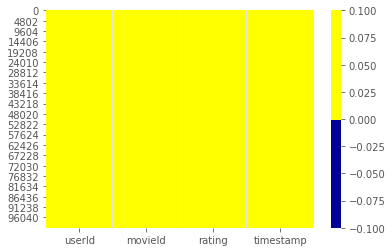

In [ ]:
#Checking for missing data
cols = movie_data.columns[:4]
#Specifying the clours to represent missing and non-missing datapoints.
#Yellow is non-missing, Blue is missing
colours = ['#000099', '#ffff00']
sns.heatmap(movie_data[cols].isnull(), cmap=sns.color_palette(colours))
#The dataset does not have any missing datapoints

In [ ]:
#Dropping columns or features not needed in this model
movie_data=movie_data.drop('timestamp',axis=1)

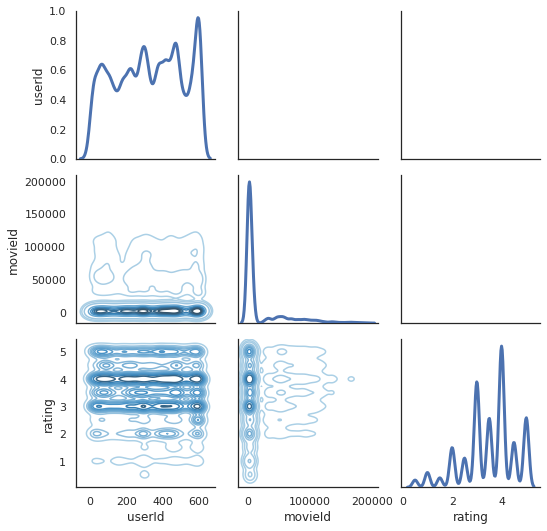

In [ ]:
######
sns.set(style="white")
df = movie_data.loc[:,['userId','movieId','rating']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


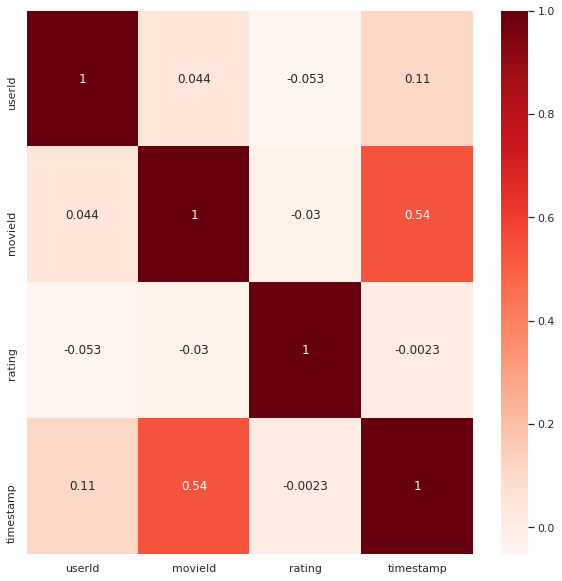

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10,10))
cor = movie_data.corr(method='spearman')
#Correlation with output variable
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
movie_data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
#Spliting the dataset into two sets, training set and test set
#80% of the data will be used for training the model 
#and 20% will be used to test the model
train_movie_data=movie_data.iloc[:int(movie_data.shape[0]*0.75)]
test_movie_data=movie_data.iloc[int(movie_data.shape[0]*0.75):]

In [ ]:
train_movie_data.shape #checking the train dataset

(75627, 3)

In [ ]:
test_movie_data.shape

(25209, 3)

In [ ]:
#Preparing a train set from train movie data

In [ ]:
#Specifying how to read the dataframe
reader=Reader(rating_scale=(1,5))
#creating the train movie data from the dataframe
train_movie_data_mf=Dataset.load_from_df(train_movie_data[['userId','movieId',
                                                           'rating']], reader)
#Building the trainset from train movie data. Making it of dataset format from
#surprise library
trainset=train_movie_data_mf.build_full_trainset()

In [ ]:
#Preparing the test set from test movie data

In [ ]:
# Again we have to Specify how to read the dataframe.
reader = Reader(rating_scale=(1,5))

# creating the test data from the dataframe...
test_movie_data_mf = Dataset.load_from_df(test_movie_data[['userId', 'movieId',
                                                           'rating']], reader)

# Building the testset from testdata. again making itof dataset format from 
#surprise library.
testset = test_movie_data_mf.build_full_trainset()

In [ ]:
svd=SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

Storing these predictions to pass to the final model as an additional feature. This will help to incorporate collaborative filtering into our system.

In [ ]:
#saving the predictions from the training 

In [ ]:
#now getting the trainset predictions
train_preds = svd.test(trainset.build_testset())
train_pred_mf = np.array([pred.est for pred in train_preds])

In [ ]:
#Processing and storing predictions for the test data

In [ ]:
#Generating the predictions of testset data
test_preds = svd.test(testset.build_testset())
test_pred_mf = np.array([pred.est for pred in test_preds])

In [ ]:
#Calculating the Root Mean Square Error to evaluate the model
train_rmse=accuracy.rmse(train_preds)

RMSE: 0.6442


In [ ]:
#XGBoost

In [ ]:
#Converting the data in the dataframe format into an interaction matrix
#user-movie interaction matrix
train_sparse_matrix = csr_matrix((train_movie_data.rating.values, 
                                         (train_movie_data.userId.values, 
                                          train_movie_data.movieId.values)))

## Creating three sets of features using this sparse matrix:
Features which represent global averages.

Features which represent the top five similar movies.

Features which represent the top five similar users

## Features representing global averages

## Getting the global average of ratings in our train set.

In [ ]:

train_averages = dict()
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.523212609253309}

In [ ]:
#Creating a function which takes the sparse matrix as input and gives 
#the average ratings of a movie given by all users, and the average rating of 
#all movies given by a single user

## Average ratings given by a given user

In [ ]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 15 is :',train_averages['user'][15])


Average rating of user 15 is : 3.448148148148148


## Average rating given for a given movie

In [ ]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n Average rating of movie 30 is :',train_averages['movie'][30])


 Average rating of movie 20 is : 4.0


## Get users, movies and ratings from our samples train sparse matrix

In [ ]:
train_users, train_movies, train_ratings = scipy.sparse.find(train_sparse_matrix)

# Feature selection
## Features which represent the top 5 similar users
In this set of features, we will create the top 5 similar users who rated a particular movie. The similarity is calculated using the cosine similarity between the users.
## Features which represent the top 5 similar movies
In this set of features, we obtain the top 5 similar movies rated by a particular user. This similarity is calculated using the cosine similarity between the movies.
Later appending all these features for each movie-user pair and create a data frame.

In [ ]:
start=time.time()

final_data = pd.DataFrame()
count = 0
for (user, movie, rating)  in zip(train_users, train_movies, train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(train_sparse_matrix[user], train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(train_sparse_matrix[:,movie].T, train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(train_averages['user'][user])
            # Avg_movie rating
            row.append(train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1
            final_data = final_data.append([row])
            print(count)

            end=time.time()


            if (count)%5000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format
                      (count, end - start))

In [ ]:
final_data.columns=['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
            'smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating']

In [ ]:
final_data.shape

(75627, 16)

In [ ]:
final_data.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,1,1,3.523213,2.0,5.0,4.0,4.0,4.5,3.0,3.0,4.0,5.0,4.0,4.366379,3.95509,4.0
0,5,1,3.523213,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,5.0,3.0,3.636364,3.95509,4.0
0,7,1,3.523213,4.0,4.0,5.0,4.5,4.0,4.5,4.0,4.5,5.0,3.0,3.230263,3.95509,4.5
0,15,1,3.523213,5.0,3.0,4.0,4.0,4.0,3.5,3.0,5.0,3.5,3.0,3.448148,3.95509,2.5
0,17,1,3.523213,4.0,5.0,4.0,4.0,4.5,4.0,4.5,5.0,3.5,5.0,4.209524,3.95509,4.5


## Detailed breakdown of the features
GAvg: Average rating of all the ratings

Similar users rating of this movie: sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie )

Similar movies rated by this user: smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by user)

UAvg: User AVerage rating

MAvg: Average rating of this movie

rating: Rating of this movie by this user.

Once we have the features ready, we’ll add the Matrix Factorization output as the last feature

In [ ]:
final_data['mf_svd']=train_pred_mf

In [ ]:
final_data.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,mf_svd
0,1,1,3.523213,2.0,5.0,4.0,4.0,4.5,3.0,3.0,4.0,5.0,4.0,4.366379,3.95509,4.0,4.317647
0,5,1,3.523213,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,5.0,3.0,3.636364,3.95509,4.0,4.220295
0,7,1,3.523213,4.0,4.0,5.0,4.5,4.0,4.5,4.0,4.5,5.0,3.0,3.230263,3.95509,4.5,4.604097
0,15,1,3.523213,5.0,3.0,4.0,4.0,4.0,3.5,3.0,5.0,3.5,3.0,3.448148,3.95509,2.5,4.807926
0,17,1,3.523213,4.0,5.0,4.0,4.0,4.5,4.0,4.5,5.0,3.5,5.0,4.209524,3.95509,4.5,4.892774


In [ ]:
#Preparing test data for XGBoost

In [ ]:
# Creating a sparse matrix
test_sparse_matrix = csr_matrix((test_movie_data.rating.values, 
                                              (test_movie_data.userId.values,
                                               test_movie_data.movieId.values)))

In [ ]:
# Global avg of all movies by all users

test_averages = dict()
# get the global average of ratings in our train set.
test_global_average = test_sparse_matrix.sum()/test_sparse_matrix.count_nonzero()
test_averages['global'] = test_global_average
test_averages

{'global': 3.436590106707922}

In [ ]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

In [ ]:
# Average ratings given by a user

test_averages['user'] = get_average_ratings(test_sparse_matrix, of_users=True)
#print('\nAverage rating of user 10 :',test_averages['user'][10])

# Average ratings given for a movie

test_averages['movie'] =  get_average_ratings(test_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15 is :',test_averages['movie'][15])


 AVerage rating of movie 15 is : 2.6666666666666665


In [ ]:
# get users, movies and ratings from our samples train sparse matrix
test_users, test_movies, test_ratings = scipy.sparse.find(test_sparse_matrix)

In [ ]:
start=time.time()

final_test_data = pd.DataFrame()
count = 0
for (user, movie, rating)  in zip(test_users, test_movies, test_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(test_sparse_matrix[user], test_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = test_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([test_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(test_sparse_matrix[:,movie].T, test_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = test_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([test_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(test_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(test_averages['user'][user])
            # Avg_movie rating
            row.append(test_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1
            final_test_data = final_test_data.append([row])
            print(count)

           
            end=time.time()


            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format
                      (count, end - start))

In [ ]:
final_test_data.columns=['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
            'smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating']

In [ ]:
final_test_data.shape

(25209, 16)

In [ ]:
test_pred_mf.shape

(25209,)

In [ ]:
final_test_data['mf_svd']=test_pred_mf

# Creating the final model
To create the final model, XGBoost is used, an optimized distributed gradient boosting library.

In [ ]:
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

In [ ]:
# prepare train data
x_train = final_data.drop(['user', 'movie','rating'], axis=1)
y_train = final_data['rating']

In [ ]:
# Prepare Test data
x_test = final_test_data.drop(['user','movie','rating'], axis=1)
y_test = final_test_data['rating']

In [ ]:
# initialize XGBoost model...
xgb_model = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
# dictionaries for storing train and test results
train_results = dict()
test_results = dict()

## Fitting the model

In [ ]:
print('Training the model..')
start =datetime.now()
xgb_model.fit(x_train, y_train, eval_metric = 'rmse')
print('Done. Time taken : {}\n'.format(datetime.now()-start))
print('Done \n')

## Getting the predictions from trained model

In [ ]:
# from the trained model, get the predictions....
print('Evaluating the model with TRAIN data...')
start =datetime.now()
y_train_pred = xgb_model.predict(x_train)

Evaluating the model with TRAIN data...


## Performance Metrics
There are two methods to evaluate a recommender system’s performance: Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE). 
RMSE measures the squared loss, while MAPE measures the absolute loss. 
Lower values mean lower error rates and thus better performance.

In [ ]:
# get the rmse and mape of train data...
rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)

In [ ]:
# store the results in train_results dictionary..
train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}

In [ ]:
train_results

{'mape': 23.622783399042323,
 'predictions': array([3.9901397, 3.869542 , 3.9282753, ..., 3.6485524, 3.6485524,
        4.130275 ], dtype=float32),
 'rmse': 0.7481251380615668}

## Getting the test data error metrics

In [ ]:
# get the test data predictions and compute rmse and mape
print('Evaluating Test data')
y_test_pred = xgb_model.predict(x_test) 
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
# store them in our test results dictionary.
test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}

Evaluating Test data


In [ ]:
test_results

{'mape': 23.420129097965404,
 'predictions': array([3.9167855, 4.2151937, 3.7768009, ..., 4.374909 , 3.855084 ,
        3.3955393], dtype=float32),
 'rmse': 0.7249094087739354}

# Conclusion

Singular value decomposition decomposes three matrices and the latent factors show the characteristics of the items. It reduces the dimension through latent factors’ extraction. By adding the regularization and bias term, it optimizes the model performance by minimizing the rmse error.

Our model resulted in 0.72 RMSE, and 23.42 MAPE on the unseen test data, which is a good-to-go model. An RMSE value of less than 2 is considered good, and a MAPE less than 25 is excellent. That said, this model can be further enhanced by adding features that would be recommended based on the top picks dependent on location or genre. We could also test the efficacy of our various models in real-time through A/B testing.


# References 
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872.

Salma Elshahawy, Msc. Towards datascience, Understanding Matrix Factorization for recommender systems


